In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

size = 100000

down = np.random.choice([4], size=size)

quarter = np.random.choice([1, 2, 3, 4], size=size)

yardsToGo = np.random.exponential(scale=3, size=size).astype(int) + 1

max_yardlineNumber = 95

yardlineNumber = np.minimum(np.random.exponential(scale=15, size=size).astype(int) + 1, max_yardlineNumber)  

defendersInTheBox = np.round(np.clip(np.random.normal(loc=6, scale=1.5, size=size), 3, 11)).astype(int)

numberOfPassRushers = np.round(np.clip(np.random.normal(loc=4, scale=1, size=size), 0, 8)).astype(int)

HomeScoreBeforePlay = np.zeros(size).astype(int)
VisitorScoreBeforePlay = np.zeros(size).astype(int)

HomeScoreAfterPlay = np.copy(HomeScoreBeforePlay)
VisitorScoreAfterPlay = np.copy(VisitorScoreBeforePlay)

for i in range(size):
    
    q1 = [0,3,6,7,10,13,14]
    q2 = [0,3,6,7,10,13,14,17,20,21,23,24]
    q3 = [0,3,6,7,10,13,14,17,20,21,23,24,27,28,31,34]
    q4 = [0,3,6,7,10,13,14,17,20,21,23,24,27,28,31,34,37,40,42]
    
    if quarter[i] == 1:
        HomeScoreBeforePlay[i] = np.random.choice(q1)
        VisitorScoreBeforePlay[i] = np.random.choice(q1)
    elif quarter[i] == 2:
        HomeScoreBeforePlay[i] = np.random.choice(q2)
        VisitorScoreBeforePlay[i] = np.random.choice(q2)
    elif quarter[i] == 3:
        HomeScoreBeforePlay[i] = np.random.choice(q3)
        VisitorScoreBeforePlay[i] = np.random.choice(q3)
    else:
        HomeScoreBeforePlay[i] = np.random.choice(q4)
        VisitorScoreBeforePlay[i] = np.random.choice(q4)

HomeScoreAfterPlay = np.copy(HomeScoreBeforePlay)
VisitorScoreAfterPlay = np.copy(VisitorScoreBeforePlay)

PlayResult = np.zeros(size).astype(int)
x = truncnorm(-5,80, loc=5, scale=5)
playresults = x.rvs(size).astype(int)

PlayResult = playresults
    
for i in range(size):
    
    if PlayResult[i] >= yardsToGo[i]:
        if PlayResult[i] > yardlineNumber[i]:
            PlayResult[i] = yardlineNumber[i]
            if np.random.choice([True, False]):
                HomeScoreAfterPlay[i] += 6
                if np.random.random() < .946:    # NFL 2022 extra point %
                    HomeScoreAfterPlay[i] += 1
            else:
                VisitorScoreAfterPlay[i] += 6
                if np.random.random() < .946:
                    VisitorScoreAfterPlay[i] += 1

PassLength = np.zeros(size).astype(int)
YardsAfterCatch = np.zeros(size).astype(int)

for i in range(size):
    if PlayResult[i] == 0:
        YardsAfterCatch[i] = 0
        PassLength[i] = 0
    elif PlayResult[i] < 0:
        x = random.choice([-1,0])
        PassLength[i] = x
        YardsAfterCatch[i] = PlayResult[i] - PassLength[i]
        
    else:
        PassLength[i] = random.randint(1, abs(PlayResult[i]))
        YardsAfterCatch[i] = PlayResult[i] - PassLength[i]
        
firstDown_Conversion = np.zeros(size).astype(int)

for i in range(size):
    
    if PlayResult[i] > yardsToGo[i]:
        firstDown_Conversion[i] += 1

newdata = pd.DataFrame({
    'down': down,
    'quarter': quarter,
    'yardsToGo': yardsToGo,
    'yardlineNumber': yardlineNumber,
    'defendersInTheBox': defendersInTheBox,
    'numberOfPassRushers': numberOfPassRushers,
    'HomeScoreBeforePlay': HomeScoreBeforePlay,
    'HomeScoreAfterPlay': HomeScoreAfterPlay,
    'VisitorScoreBeforePlay': VisitorScoreBeforePlay,
    'VisitorScoreAfterPlay': VisitorScoreAfterPlay,
    'PassLength': PassLength,
    'YardsAfterCatch': YardsAfterCatch,
    'PlayResult': PlayResult,
    'firstDown_Conversion': firstDown_Conversion
})

newdata = newdata.dropna()
newdata.to_csv('generated_data.csv', index=False)

In [2]:
newdata

,down,quarter,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,HomeScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreBeforePlay,VisitorScoreAfterPlay,PassLength,YardsAfterCatch,PlayResult,firstDown_Conversion
0,4,1,8,26,7,3,10,10,10,10,10,0,10,1
1,4,3,1,7,5,5,23,23,0,7,3,4,7,1
2,4,4,3,21,4,4,14,14,27,27,2,10,12,1
3,4,1,2,2,7,5,0,7,0,0,2,0,2,0
4,4,3,5,14,5,5,28,28,24,24,3,6,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,4,3,36,3,3,21,21,24,24,-1,0,-1,0
99996,4,2,9,5,8,4,7,7,21,21,0,-4,-4,0
99997,4,2,6,4,7,5,17,17,13,13,2,3,5,0
99998,4,3,1,5,7,3,7,7,14,14,0,0,0,0


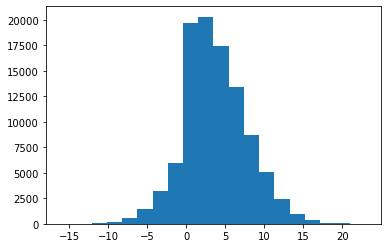

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

plt.hist(PlayResult, bins=20)
plt.show()

# Logistic Regression (code copied from file)

In [7]:
# Split the dataset into training and testing sets (70-30 split is ideal)
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(newdata.drop('firstDown_Conversion', axis=1), 
                                                    newdata['firstDown_Conversion'], test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Print the size of the training and testing sets
print(f"Training set size: {len(X_train_scaled)}\nTest set size: {len(X_test_scaled)}")

Training set size: 70000
Test set size: 30000


In [8]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict the response variable for the testing data and calculate accuracy score
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16006     0]
 [    0 13994]]


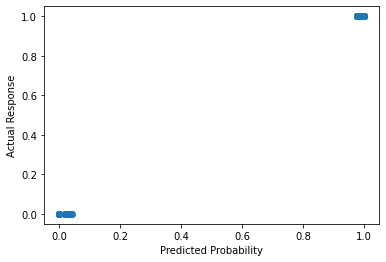

In [10]:
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
plt.scatter(y_prob, y_test)
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Response')
plt.show()

# Decision Tree (code from UPDATED Project Stats file)

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training set
dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test_scaled)

# Evaluate the accuracy of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.99%


In [12]:
print(tree.export_text(dt, feature_names = list(pd.DataFrame(X_train_scaled).columns)) )

|--- 12 <= -0.29
|   |--- 12 <= -0.53
|   |   |--- class: 0
|   |--- 12 >  -0.53
|   |   |--- 2 <= -0.68
|   |   |   |--- class: 1
|   |   |--- 2 >  -0.68
|   |   |   |--- class: 0
|--- 12 >  -0.29
|   |--- 2 <= 0.32
|   |   |--- 12 <= -0.05
|   |   |   |--- 2 <= -0.35
|   |   |   |   |--- class: 1
|   |   |   |--- 2 >  -0.35
|   |   |   |   |--- class: 0
|   |   |--- 12 >  -0.05
|   |   |   |--- 2 <= -0.01
|   |   |   |   |--- class: 1
|   |   |   |--- 2 >  -0.01
|   |   |   |   |--- 12 <= 0.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- 12 >  0.19
|   |   |   |   |   |--- class: 1
|   |--- 2 >  0.32
|   |   |--- 12 <= 0.67
|   |   |   |--- 12 <= 0.43
|   |   |   |   |--- class: 0
|   |   |   |--- 12 >  0.43
|   |   |   |   |--- 2 <= 0.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- 2 >  0.65
|   |   |   |   |   |--- class: 0
|   |   |--- 12 >  0.67
|   |   |   |--- 2 <= 1.32
|   |   |   |   |--- 2 <= 0.99
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- 2 >

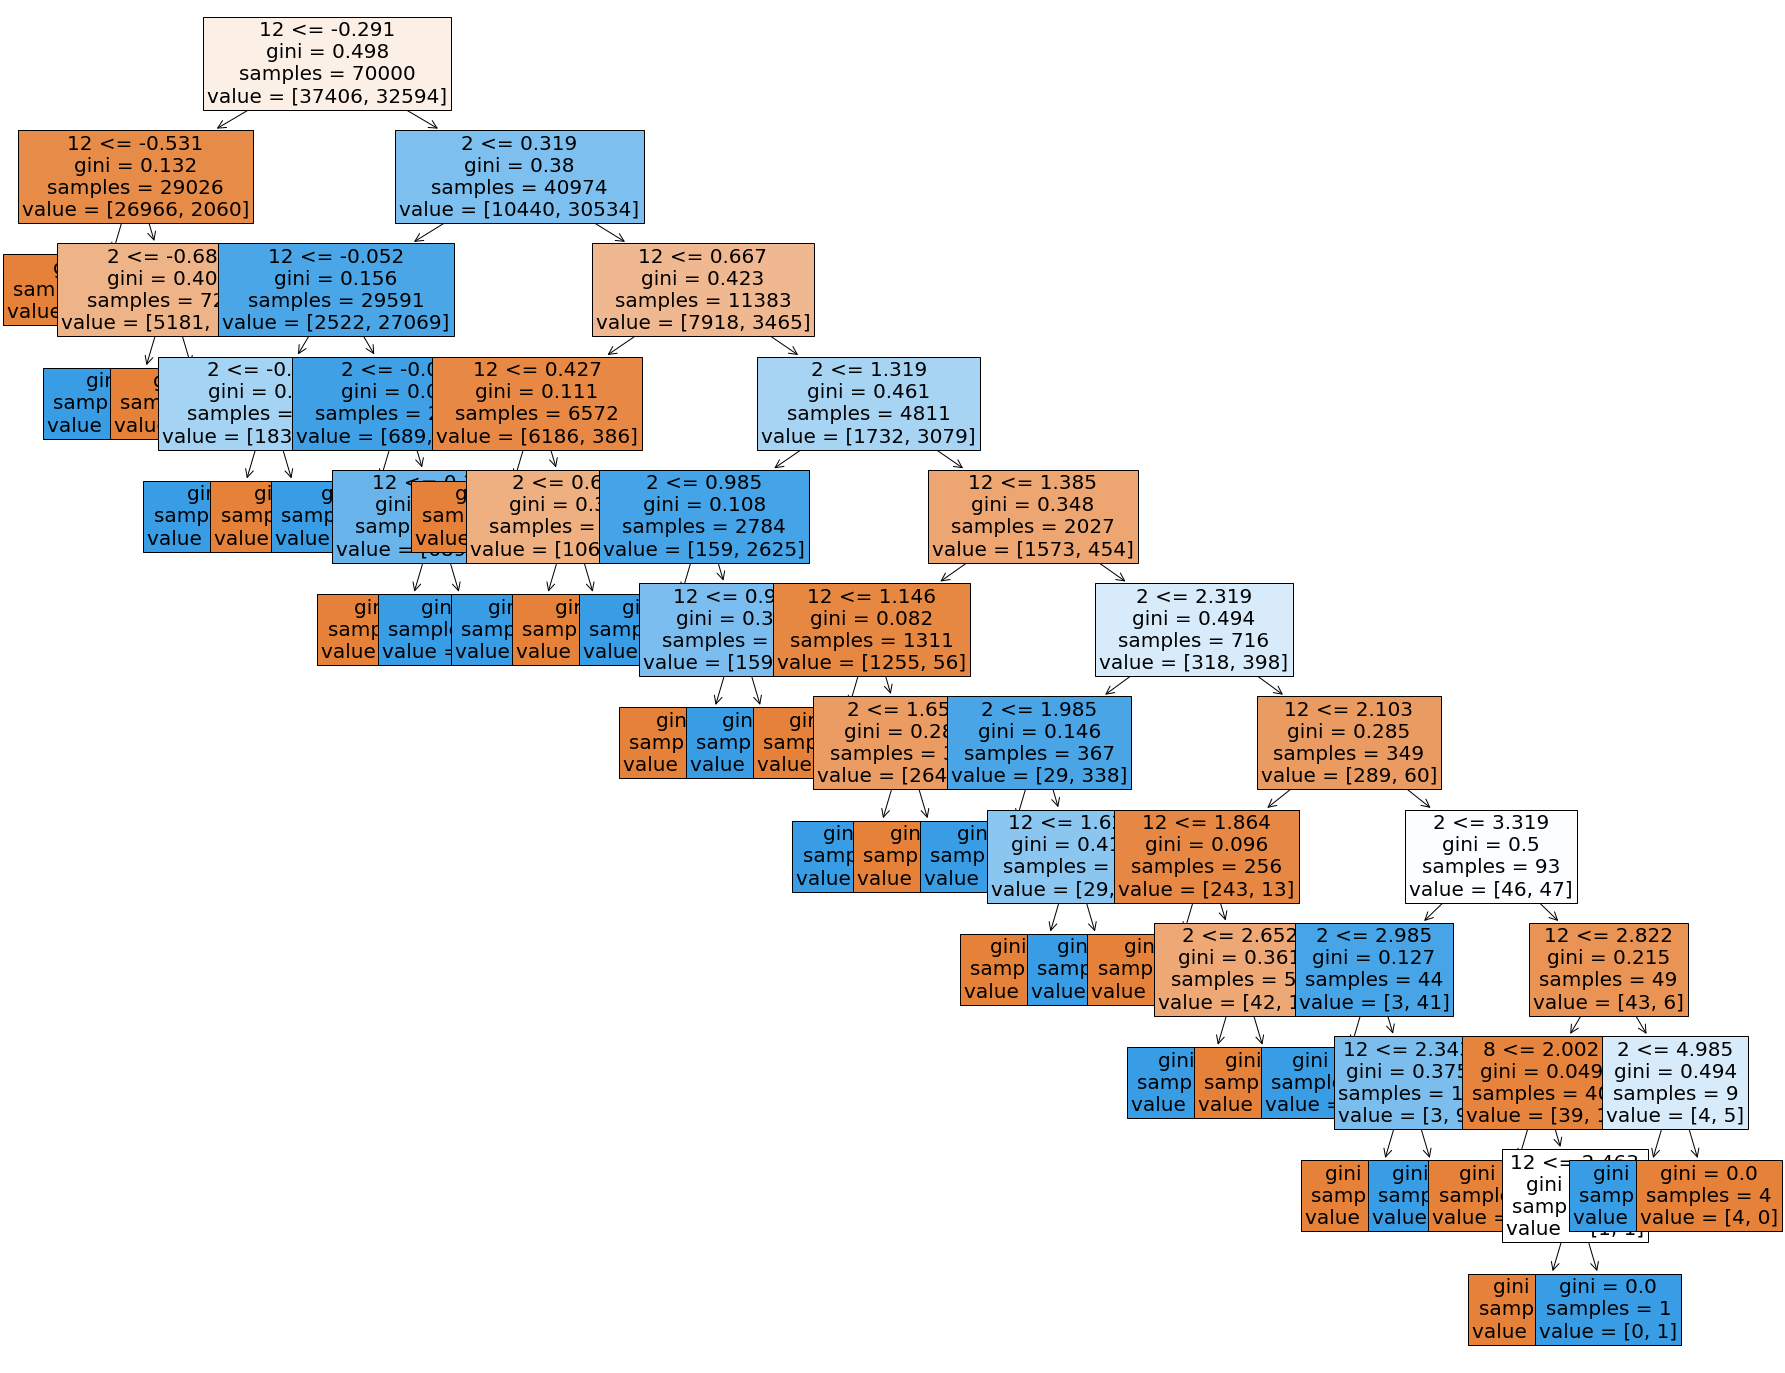

In [15]:
fig = plt.figure(figsize = (30,25))
ax = fig.add_subplot(111)
tree.plot_tree(dt, feature_names = list(pd.DataFrame(X_train_scaled).columns), 
               filled = True, fontsize = 20, ax=ax)
# annotate the tree nodes with class labels
n_nodes = dt.tree_.node_count
children_left = dt.tree_.children_left
children_right = dt.tree_.children_right
feature = dt.tree_.feature
threshold = dt.tree_.threshold
value = dt.tree_.value
class_names = dt.classes_

def annotate_tree(node, ax):
    if children_left[node] == children_right[node]:
        # leaf node
        counts = value[node].squeeze().astype(int)
        label = '\n'.join([f"{class_name}: {count}" for class_name, count in zip(class_names, counts)])
        ax.annotate(label, (threshold[node], node), 
                    xytext=(5, 5), textcoords='offset points', 
                    ha='left', va='center', fontsize=16)
    else:
        # internal node
        feature_name = list(pd.DataFrame(X_train_scaled).columns)[feature[node]]
        ax.annotate(f"{feature_name} <= {threshold[node]:.2f}", (threshold[node], node), 
                    xytext=(-5, -5), textcoords='offset points', 
                    ha='right', va='top', fontsize=16)
        annotate_tree(children_left[node], ax)
        annotate_tree(children_right[node], ax)

annotate_tree(0, ax)

In [16]:
from sklearn.metrics import mean_squared_error

# Calculating mean squared error
yhat = dt.predict(pd.DataFrame(X_test_scaled))
mean_squared_error(y_test, yhat)

0.0001

# Support Vector Machine

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

# Finding best params
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]
tuned_parameters = [{'C': C_list}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X_train_scaled, y_train)

# Our best parameter is C=5
clf.best_params_

{'C': 0.001}

In [21]:
clf = SVC(kernel='linear', C=0.001)
clf.fit(pd.DataFrame(X_train_scaled), y_train)

SVC(C=0.001, kernel='linear')

In [22]:
pred = clf.predict(X_test_scaled)
mean_squared_error(y_test, pred)

0.0